#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings(action = 'ignore')

#### Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
y = y.reshape(len(y),1)

#### Feature Scaling (Standardisation)
Used in case of Support Vector Regression model to standardize the data.

In [4]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

#### Training the Support Vector Regression model on the whole dataset

In [5]:
from sklearn.svm import SVR
regression = SVR(kernel = 'rbf')
regression.fit(x, y)

SVR()

#### Predicting a new result 

In [6]:
sc_y.inverse_transform(regression.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

#### Visualising the Support Vector Regression results

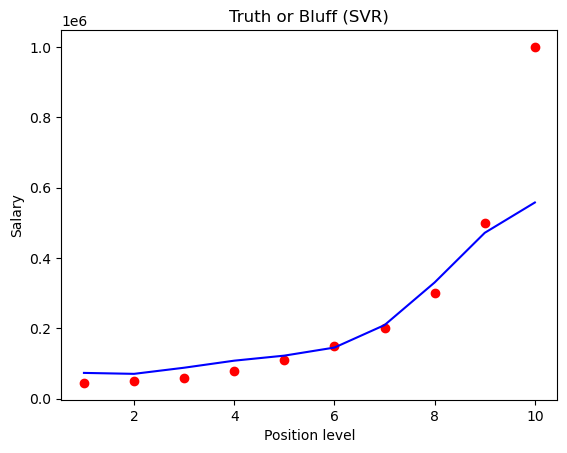

In [7]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regression.predict(x).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#### Visualising the Support Vector Regression results (for higher resolution and smoother curve)

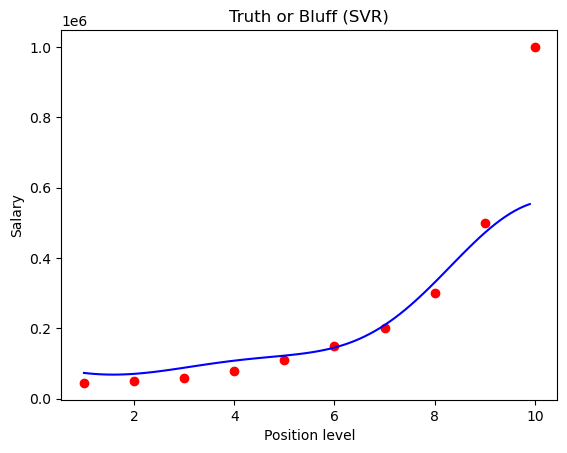

In [8]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regression.predict(sc_x.transform(x_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()